In [30]:
import pandas as pd
df = pd.read_csv('trestle_academy_dataset.csv')
# first five rows

# df.head()
# df.info
# df.describe()
# df.columns
# df.isnull()





In [31]:
# filename = 'messy.txt'

# r = read file
# w = write to file
# r+ = read/write file
# a = append to file


# with open(filename, 'r') as file:
#     file_data = file.read()
#     print(file_data)


# wriet to a file 
filename =  'write_file.txt'
# with open(filename, 'w') as file:
#     file_data = file.write('Today is an.')


with open(filename, 'a') as file:
    file_data = file.write('\nWe have appended a new line\n')
    file_data = file.write('Writing new one again\n')
    file_data = file.write('Writing new one again\n')

    

In [32]:
df = pd.read_excel('latitude.xls')

df.head()
df.info
df.describe()
df.columns
df.isnull()




,country,1700
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
241,False,False
242,False,True
243,False,False
244,False,False


In [33]:
# check for missin values
import pandas as pd 
data = pd.read_csv('trestle_academy_dataset.csv')
data.isnull()

,student_id,name,age,gender,course,enrollment_date,final_grade,is_intern
0,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [34]:
if 'age' in data.columns and data['age'].isnull().sum() > 0:
    average_age = data['age'].mean()
    data['age'].fillna(average_age, inplace = True)

In [35]:


# 2. Handle Missing Values
# Check for any missing values in each column
print("\nChecking for missing values:")
print(df.isnull().sum())

#incase there might be some missing values in 'age' or 'final_grade'
# Fill missing 'age' with the mean age
if 'age' in df.columns and df['age'].isnull().sum() > 0:
    mean_age = df['age'].mean()
    df['age'].fillna(mean_age, inplace=True)
    print(f"Filled missing values in 'age' with mean age: {mean_age}")

    # Fill missing 'final_grade' with median grade
if 'final_grade' in df.columns and df['final_grade'].isnull().sum() > 0:
    median_grade = df['final_grade'].median()
    df['final_grade'].fillna(median_grade, inplace=True)
    print(f"Filled missing values in 'final_grade' with median grade: {
          median_grade}")


Checking for missing values:
country    0
1700       4
dtype: int64


In [ ]:
data['age'] = data['age'].astype(int)
data['final_grade'] = data['final_grade'].astype(int)
data['enrollment_date'] = pd.to_datetime(data['enrollment_date'])

In [ ]:
import datetime as dt
date = dt.datetime.today()

date = dt.datetime.today().strftime('%Y-%m-%d')
print('Date:',date)

time = dt.datetime.today().strftime('%I:%M:%S %p')
print('Time:', time)


Date: 2024-11-12
Time: 07:40:11 PM


In [ ]:

# 3. Standardize Data Types
# Ensure 'age' and 'final_grade' are integers, 'enrollment_date' is a date
df['age'] = df['age'].astype(int)
df['final_grade'] = df['final_grade'].astype(int)
df['enrollment_date'] = pd.to_datetime(df['enrollment_date'])
# check whether age, finally_grade and enrollment_date has been updated to int
df.head()

In [ ]:
# 4. Normalize Text Data
# Convert text in 'course' and 'gender' to title case for consistency
df['course'] = df['course'].str.title()
df['gender'] = df['gender'].str.title()
df.head()

In [ ]:

# 5. Filter Unwanted Data
# Filter out rows where 'age' is outside the student age range (18 to 45)
df = df[|(df['age'] >= 18)| & (df['age'] <= 45)]

In [ ]:
# 6. Correct Inconsistent Entries
# Standardize 'is_intern' column to have consistent 'Yes'/'No' values
# We will use a for loop instead 

# Convert inconsistent entries in 'is_intern' to 'Yes' or 'No'
for i in range(len(df['is_intern'])):
    # Convert value to lowercase for consistency
    value = str(df.loc[i, 'is_intern']).lower()
    if value in ['yes', 'y', 'true', '1']:
        df.loc[i, 'is_intern'] = 'Yes'
    else:
        df.loc[i, 'is_intern'] = 'No'

print("\nStandardized 'is_intern' column values:")
print(df['is_intern'].value_counts())

In [ ]:

# 7. Save the Cleaned Data
# Save the cleaned dataset to a new file for pipeline ingestion
cleaned_dataset_path = 'cleaned_trestle_academy_dataset.csv'
df.to_parquet(cleaned_dataset_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_dataset_path}")

# Final confirmation of cleaned data
print("\nCleaned Data Preview:")
print(df.head())
print("\nCleaned Data Summary:")
print(df.info())

In [ ]:
# using loc 
import pandas as pd
df = pd.read_csv('trestle_academy_dataset.csv')
data = df.loc[:, ['student_id', 'course', 'final_grade']]
new_data = data.to_csv('new_student.csv', index=False)
df.head()



In [ ]:
# id, course, final_grade >= 80
data = df.loc[(df['final_grade'] >= 80), [
    'student_id', 'course', 'final_grade']]

passed_students = data.to_csv('passed_students.csv', index = False)

In [ ]:
pd.read_csv('passed_students.csv')

In [ ]:
import pandas as pd 
import numpy as np

filename = 'titanic.csv'
data = pd.read_csv(filename)
data['Fare'] = round(data['Fare'], 2)
# data['Fare'] = data['Age'].astype('Fare')
data.head()

In [ ]:
from sqlalchemy import create_engine
import pandas as pd  
engine = create_engine('sqlite:///Northwind.sqlite')
con = engine.connect()
query = con.execute("SELECT * FROM Orders")
df = pd.DataFrame(query.fetchall())
con.close()
df.head()

In [ ]:
data = pd.read_csv('articles.csv')
data.head()

# WORKING WITH API USING ENVIRONMENTA VARIABLES

In [ ]:
import requests as r
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Access the API key from environment variables
api_key = os.getenv('API_KEY')

url = 'https://newsapi.org/v2/top-headlines'
params = {'country': 'gr'}
headers = {'Authorization': f'Bearer {api_key}'}

response = r.get(url, params=params, headers=headers)
data = response.json()
for article in data['articles']:
    print(article.get('title'))




In [ ]:
from urllib.request import urlretrieve as r
import pandas as pd
url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
response = r(url, 'winequality-red.csv')
df = pd.read_csv('winequality-red.csv', sep=';')
columns = df.columns
df.head()


In [ ]:
# Import package
import pandas as pd
from urllib.request import urlretrieve

# Assign url of file: url
url = 'https://assets.datacamp.com/course/importing_data_into_r/latitude.xls'
urlretrieve(url, 'latitude.xls')

# Read in all sheets of Excel file: xls
xls = pd.read_excel('latitude.xls', sheet_name=None)

# Print the sheetnames to the shell
print(xls.keys())

# Print the head of the first sheet (using its name, NOT its index)
print(xls['1700'].head())

In [ ]:
import requests as r 
url = "https://campus.datacamp.com/courses/1606/4135?ex=2"
response = r.get(url)
response_text = response.text
print(response_text)

# YOU CAN PLAY WITH THIS MORE 

In [ ]:
from bs4 import BeautifulSoup as BS
import requests as r 

url = "https://www.billboard.com/pro/indie-labels-own-half-recorded-music-market-midia-report/"
response = r.get(url)
html_doc = response.text
soup = BS(html_doc, 'html.parser')  # Specify parser for better consistency

titles = soup.find_all('title')
filename = 'blog.txt'

# Open file and write each title to a new line
with open(filename, 'a') as file:
    for title in titles:
        file.write(title.text + '\n')


In [ ]:
import pandas as pd
import datetime as dt
# Load the data
data = pd.read_csv('titanic.csv')


# Calculate summary statistics and add them as new columns
data['Average_Age'] = data['Age'].mean()
data['Max_Age'] = data['Age'].max()
data['Min_Age'] = data['Age'].min()

data['Average_Fare'] = round(data['Fare'].mean(), 2)
data['Max_Fare'] = data['Fare'].max()
data['Min_Fare'] = data['Fare'].min()

# add dates 
# get the time of today
data['Date'] = dt.datetime.now().strftime('%Y-%m-%d')
data['Time']= dt.datetime.now().strftime('%I:%M:%S %p')
# Create a new DataFrame with only the new columns
new_data = data[['Average_Age', 'Max_Age', 'Min_Age',
                 'Average_Fare', 'Max_Fare', 'Min_Fare', 'Date', 'Time']].copy()
``
# Save the new DataFrame to a Parquet file
new_data.to_csv('titanic_summary.csv', index=False)

# Read the Parquet file to verify
read_data = pd.read_csv('titanic_summary.csv')
print(read_data.head())

In [ ]:
data1 = pd.read_csv('titanic.csv', nrows=10)


In [ ]:
# Create boolean columns for each age group in the original DataFrame
data['Children'] = data['Age'] < 13
data['Adolescent'] = (data['Age'] >= 13) & (data['Age'] < 18)
data['Adult'] = (data['Age'] >= 18) & (data['Age'] < 65)
data['OldAge'] = data['Age'] >= 65

# Check the first few rows to verify the new columns
data[['Age', 'Children', 'Adolescent', 'Adult', 'OldAge']].copy()

data.to_csv('Age_classification.csv', index=False)
df = pd.read_csv('Age_classification.csv')
df.head()



In [ ]:
children = data[data['Age'] < 13]

data['datetime'] = pd.to_datetime(data['Date']).dt.date

for date in data['datetime']:
    print(date)

 # BUILDING AN ETL PIPELINEB BELOW

In [ ]:
import pandas as pd


def extract(filename):
    """
    Extract data from a file based on its extension.
    """
    print(f"Extracting data from '{filename}'...\n")
    try:
        if filename.endswith('.csv'):
            return pd.read_csv(filename)
        elif filename.endswith('.txt'):
            with open(filename, 'r') as file_obj:
                return pd.DataFrame([line.strip() for line in file_obj.readlines()], columns=['text'])
        elif filename.endswith('.parquet'):
            return pd.read_parquet(filename)
        elif filename.endswith(('.xlsx', '.xls')):
            return pd.read_excel(filename)
        else:
            raise ValueError("Unsupported file type.")
    except FileNotFoundError:
        print(f"Error: The file '{filename}' does not exist.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


def transform(dataframe):
    """
    Transform the dataframe by selecting specific columns.
    """
    try:
        if {'student_id', 'name', 'course', 'final_grade'}.issubset(dataframe.columns):
            dataframe = dataframe[['student_id',
                                   'name', 'course', 'final_grade']]
            return dataframe
        else:
            raise KeyError(
                "Missing one or more required columns: 'student_id', 'name', 'course', 'final_grade'")
    except Exception as e:
        print(f"An error occurred during transformation: {e}")
        return None


def load(dataframe, save_filename):
    """
    Load the dataframe into a CSV file.
    """
    try:
        dataframe.to_csv(save_filename, index=False)
        print(f"Data successfully saved to '{save_filename}'.")
        return dataframe.head()
    except Exception as e:
        print(f"An error occurred while saving the file: {e}")
        return None


In [ ]:
# Extracting the data 
extracting = extract('trestle_academy_dataset.csv')
# Transforming the data 
transforming = transform(dataframe = extracting)
#load and save data to csv
load_data = load(dataframe = transforming, save_filename='trestle.csv')


In [ ]:
import requests as r
import pandas as pd


# Define the API endpoint with query parameters and your API key

url = 'https://newsapi.org/v2/top-headlines'

params = {

    'country': 'us',  # Articles from the United States

    'category': 'technology',  # Technology-related articles

    'q': 'AI',  # Articles that mention AI

    'pageSize': 5,  # Get 5 articles per page

    'page': 1,  # First page

    'apiKey': 'e7811595ab0748339199934ed4a0cec3'  # Replace with your actual API key

}

# Make the request

response = r.get(url, params=params)


if response.status_code == 200:
    data = response.json()
    # Extract and structure the articles
    articles = []
    for article in data.get('articles', []):
        articles.append({
            "Title": article.get('title', 'N/A'),
            "Description": article.get('description', 'N/A'),
            "URL": article.get('url', 'N/A')
        })

    # Create a DataFrame
    df = pd.DataFrame(articles)

    # Adjust column order and formatting
    df = df[["Title", "Description", "URL"]].rename(columns={
        "Title": "📰 Title",
        "Description": "📝 Description",
        "URL": "🔗 URL"
    })

    # Show the DataFrame in a neat format
    print(df.to_string(index=False))  # Suppress the index when printing

    # Optionally save to a file for reference
    df.to_csv("articles.csv", index=False)

    print("\nData successfully saved to 'articles.csv'.")
else:
    print(f"Failed to fetch data: {response.status_code}")

# THE CODE ABOVE IS THE SAME IUS THE CODE  BELOW EXCEPT THAT, IT DOES NOT TRANSFORM THE COLUMNS  

In [ ]:
import requests
import pandas as pd
url = 'https://newsapi.org/v2/top-headlines'
params = {
    'country': 'us',
    'category': 'technology',
    'q': 'AI',
    'apikey': 'e7811595ab0748339199934ed4a0cec3'
}
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    articles = []
    for article in data.get('articles'):
        articles.append({
            'Title': article.get('title', 'N/A'),
            'Author': article.get('author', 'N/A'),
            'Url': article.get('url', 'N/A'),
            'Description': article.get('description', 'N/A')

        })
    df = pd.DataFrame(articles)
    df.to_csv('articles.csv', index=False)

In [2]:
# WRITE YOUR CODE HERE
import requests
import pandas as pd



In [4]:
import requests

# Example URL (customize to your chosen API)
api_url = "https://jokeapi.dev/joke/Any"

response = requests.get(api_url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    print(data)  # Print out the fetched data
else:
    print("Error fetching data:", response.status_code)

{'error': False, 'category': 'Misc', 'type': 'single', 'joke': 'Stop being homophobic and rude to the LGBTQ+ community. You should be thanking them for saving us plenty of room in heaven.', 'flags': {'nsfw': False, 'religious': True, 'political': False, 'racist': False, 'sexist': False, 'explicit': False}, 'id': 114, 'safe': False, 'lang': 'en'}


In [8]:
import requests
import pandas as pd

def fetch_joke():
    # Example URL (you can customize this for other APIs)
    api_url = "https://jokeapi.dev/joke/Any"
    response = requests.get(api_url)

    if response.status_code == 200:
        return response.json()
    else:
        print("Error fetching data:", response.status_code)
        return None

def main():
    # Fetch the joke data
    joke_data = fetch_joke()
    
    # Check if data was retrieved successfully
    if joke_data:
        # Create a DataFrame from the data
        df = pd.DataFrame([joke_data])  # Wrapping 'joke_data' in a list to convert to DataFrame
        
        # Save the DataFrame to CSV
        df.to_csv('jokes_data.csv', index=False)
        print("Data saved to 'jokes_data.csv'!")

if __name__ == "__main__":
    main()

Data saved to 'jokes_data.csv'!


In [11]:
import requests
import pandas as pd

def fetch_joke():
    api_url = "https://jokeapi.dev/joke/Any"
    response = requests.get(api_url)

    if response.status_code == 200:
        return response.json()
    else:
        print("Error fetching data:", response.status_code)
        return None

def main():
    joke_data = fetch_joke()
    if joke_data:
        # Create a DataFrame
        df = pd.DataFrame([joke_data])  
        # Save to CSV
        df.to_csv('jokes_data.csv', index=False)
        print("Data saved to 'jokes_data.csv'!")

if __name__ == "__main__":
    main()

Data saved to 'jokes_data.csv'!


In [16]:
pip install requests pandas

Note: you may need to restart the kernel to use updated packages.


In [18]:
import requests
import pandas as pd

# Your Spoonacular API Key
API_KEY = "5ca0c0715f32487d87a470effcd8d8f5"

def fetch_random_recipe():
    api_url = f"https://api.spoonacular.com/recipes/random?apiKey={API_KEY}"
    
    response = requests.get(api_url)

    if response.status_code == 200:
        return response.json()  # Return the JSON response
    else:
        print("Error fetching data:", response.status_code)
        return None

def main():
    # Fetch random recipe data
    recipe_data = fetch_random_recipe()
    
    # Check if data was retrieved successfully
    if recipe_data:
        # Access the recipe information
        recipe = recipe_data['recipes'][0]  # Get the first recipe from the list
        
        # Create a DataFrame with relevant recipe data
        df = pd.DataFrame([{
            'title': recipe['title'],
            'readyInMinutes': recipe['readyInMinutes'],
            'servings': recipe['servings'],
            'image': recipe['image'],
            'summary': recipe['summary'],
            'instructions': recipe['instructions']
        }])

        # Save the DataFrame to CSV
        df.to_csv('random_recipe.csv', index=False)
        print("Random recipe data saved to 'random_recipe.csv'!")

if __name__ == "__main__":
    main()

Random recipe data saved to 'random_recipe.csv'!


In [26]:
import requests
import pandas as pd

# Step 1: Set up API details
API_KEY = "5ca0c0715f32487d87a470effcd8d8f5"  # Your Spoonacular API key
BASE_URL = "https://api.spoonacular.com/recipes/complexSearch"

# Step 2: Define request parameters
params = {
    "query": "pasta",        # Search term
    "number": 20,             # Number of recipes to fetch
    "apiKey": API_KEY        # Your API key
}

# Step 3: Make the API request
response = requests.get(BASE_URL, params=params)

if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    print("API response fetched successfully!")
else:
    print("Error:", response.status_code, response.text)
    exit()

# Step 4: Extract and structure relevant data
# Example: Extract recipe titles, IDs, and image URLs
recipes = []
for recipe in data.get("results", []):
    recipes.append({
        "ID": recipe.get("id"),
        "Title": recipe.get("title"),
        "Image": recipe.get("image")
    })

# Step 5: Convert data to a DataFrame
df = pd.DataFrame(recipes)
print(df)

# Step 6: Save the data to a CSV file
output_file = "recipes_data.csv"
df.to_csv(output_file, index=False)
print(f"Recipe data saved to {output_file}")


API response fetched successfully!
         ID                                              Title  \
0    642583                  Farfalle with Peas, Ham and Cream   
1    715538  What to make for dinner tonight?? Bruschetta S...   
2    650126                               Linguine E Americana   
3    634629                               Beef Lo Mein Noodles   
4    655575               Penne Pasta with Broccoli and Cheese   
5    649817             Lemon White Wine Chicken over Linguini   
6    667704                 Shrimp, Bacon, Avocado Pasta Salad   
7    662773  Tagliatelle Con Vongole - Pasta With Little Clams   
8    656298                                    Pistachio Pasta   
9    654797              Pasta A La Lydia (Halloween Inspired)   
10  1095873                        Cheesy Tortellini Casserole   
11   636238            Broccoli, Sausage and Fresh Basil Pasta   
12   668492                      Creamy zucchini and ham pasta   
13   637592                Cheese Tortell

In [31]:
# Step 1: Define a list of queries to test
queries = ["pizza", "salad", "dessert", "burger", "smoothie"]

# Step 2: Loop through each query and fetch results
for query in queries:
    print(f"\nFetching recipes for: {query}\n")
    
    # Define request parameters for each query
    params["query"] = query
    response = requests.get(BASE_URL, params=params)
    
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()
        
        # Extract recipe details
        recipes = []
        for recipe in data.get("results", []):
            recipes.append({
                "ID": recipe.get("id"),
                "Title": recipe.get("title"),
                "Image": recipe.get("image")
            })
        
        # Display the fetched recipes
        print(pd.DataFrame(recipes))
    else:
        print(f"Error fetching {query}: {response.status_code} {response.text}")



Fetching recipes for: pizza

        ID                                              Title  \
0   658615              Roasted Peppers, Spinach & Feta Pizza   
1   658920                       Rustic Grilled Peaches Pizza   
2   656329                           Pizza bites with pumpkin   
3   680975                                          BLT Pizza   
4   716300                                     Plantain Pizza   
5   665769                               Zucchini Pizza Boats   
6   655698                            Pepperoni Pizza Muffins   
7   641893                        Easy Cheesy Pizza Casserole   
8   654523                                 Paneer & Fig Pizza   
9   655847                                 Pesto Veggie Pizza   
10  651956                                Mini eggplant pizza   
11  636593                             Butternut Squash Pizza   
12  662264                             summer vegetable pizza   
13  661640                             Stilton Balsamic Pizz

In [35]:
# Step 1: Define a function to fetch detailed recipe information
def fetch_recipe_details(recipe_id):
    detail_url = f"https://api.spoonacular.com/recipes/{recipe_id}/information"
    detail_params = {"apiKey": API_KEY}
    response = requests.get(detail_url, params=detail_params)
    
    if response.status_code == 200:
        return response.json()  # Return JSON response
    else:
        print(f"Error fetching details for recipe ID {recipe_id}: {response.status_code} {response.text}")
        return {}

# Step 2: Loop through IDs from previous fetch
recipe_details = []
for recipe in recipes:  # Use the `recipes` list from the previous step
    recipe_id = recipe["ID"]
    details = fetch_recipe_details(recipe_id)
    
    # Extract specific fields from the detailed response
    recipe_details.append({
        "ID": recipe_id,
        "Title": recipe.get("Title"),
        "Image": recipe.get("Image"),
        "Servings": details.get("servings"),
        "Ready in Minutes": details.get("readyInMinutes"),
        "Source URL": details.get("sourceUrl")
    })

# Step 3: Convert detailed data to a DataFrame
detailed_df = pd.DataFrame(recipe_details)
print(detailed_df)

# Step 4: Save the detailed data to a CSV file
output_file = "detailed_recipes_data.csv"
detailed_df.to_csv(output_file, index=False)
print(f"Detailed recipe data saved to {output_file}")


         ID                                           Title  \
0    638825          CHOCOLATE BANANA MORNING BUZZ SMOOTHIE   
1   1697525  6 Quick & Easy Smoothies To Start Your Morning   
2   1095931                                 Matcha Smoothie   
3   1096176      Mango, Persimmon Smoothie with Cranberries   
4    654515                                 Pandan Smoothie   
5    650498                                 Lychee Smoothie   
6    634180                           Banana Smoothie Boost   
7    632575                              Apple Pie Smoothie   
8    681706                        Mango Chia Smoothie Bowl   
9    657359                            Pumpkin Pie Smoothie   
10   639728                          Coconut Bliss Smoothie   
11   715393                     Berry-licious Smoothie Bowl   
12  1681373                Green Monster Smoothie Popsicles   
13   655195                         Peachy NanaNut Smoothie   
14  1681445                      Pomegranates Oats Smoo

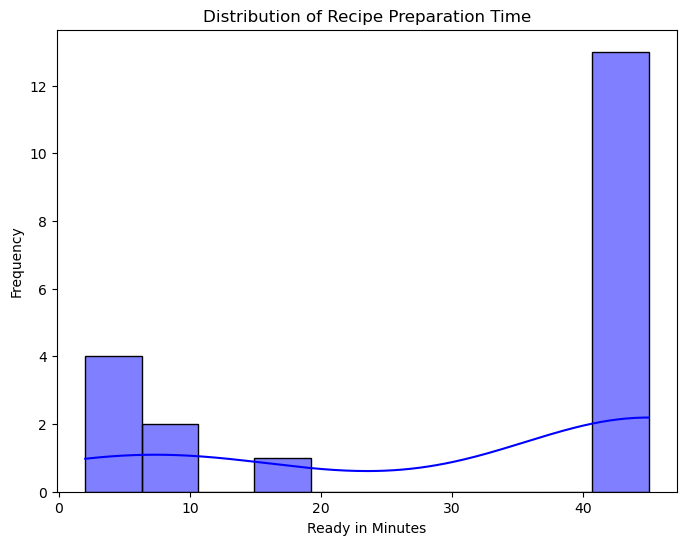

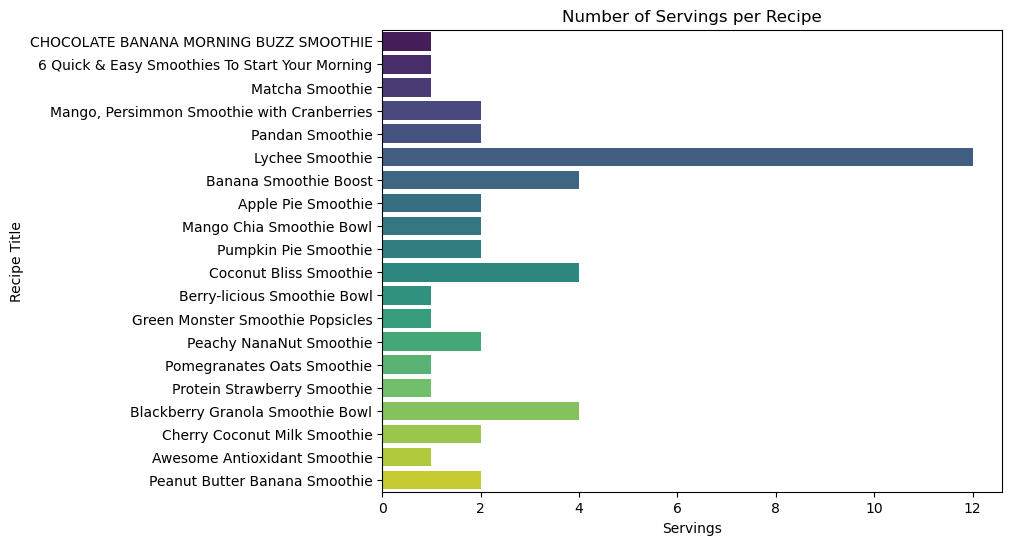

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the saved detailed CSV file
detailed_df = pd.read_csv("detailed_recipes_data.csv")

# Step 2: Plot distribution of preparation time
plt.figure(figsize=(8, 6))
sns.histplot(detailed_df["Ready in Minutes"], bins=10, kde=True, color="blue")
plt.title("Distribution of Recipe Preparation Time")
plt.xlabel("Ready in Minutes")
plt.ylabel("Frequency")
plt.show()

# Step 3: Bar chart of servings
plt.figure(figsize=(8, 6))
sns.barplot(x="Servings", y="Title", data=detailed_df, palette="viridis")
plt.title("Number of Servings per Recipe")
plt.xlabel("Servings")
plt.ylabel("Recipe Title")
plt.show()
